In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d sumn2u/garbage-classification-v2

Dataset URL: https://www.kaggle.com/datasets/sumn2u/garbage-classification-v2
License(s): MIT
100% 751M/752M [00:45<00:00, 20.0MB/s]
100% 752M/752M [00:45<00:00, 17.4MB/s]


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!unzip /content/garbage-classification-v2.zip

Streaming output truncated to the last 5000 lines.
  inflating: plastic/plastic_1508.jpg  
  inflating: plastic/plastic_1509.jpg  
  inflating: plastic/plastic_151.jpg  
  inflating: plastic/plastic_1510.jpg  
  inflating: plastic/plastic_1511.jpg  
  inflating: plastic/plastic_1512.jpg  
  inflating: plastic/plastic_1513.jpg  
  inflating: plastic/plastic_1514.jpg  
  inflating: plastic/plastic_1515.jpg  
  inflating: plastic/plastic_1516.jpg  
  inflating: plastic/plastic_1517.jpg  
  inflating: plastic/plastic_1518.jpg  
  inflating: plastic/plastic_1519.jpg  
  inflating: plastic/plastic_152.jpg  
  inflating: plastic/plastic_1520.jpg  
  inflating: plastic/plastic_1521.jpg  
  inflating: plastic/plastic_1522.jpg  
  inflating: plastic/plastic_1523.jpg  
  inflating: plastic/plastic_1524.jpg  
  inflating: plastic/plastic_1525.jpg  
  inflating: plastic/plastic_1526.jpg  
  inflating: plastic/plastic_1527.jpg  
  inflating: plastic/plastic_1528.jpg  
  inflating: plastic/plastic_15

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [7]:
data_path = "/content/garbage"
batch_size = 64
image_size = (150, 150)

In [8]:
data = ImageDataGenerator(
    rescale=1.0/255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    horizontal_flip=True,
    validation_split=0.1
)

In [9]:
train_data = data.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    subset="training"
)

valid_data = data.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=batch_size,
    subset="validation"
)

Found 21283 images belonging to 10 classes.
Found 2359 images belonging to 10 classes.


In [10]:
labels = ['battery','biological','cardboard','clothes','glass',
          'metal', 'paper','plastic','shoes', 'trash']

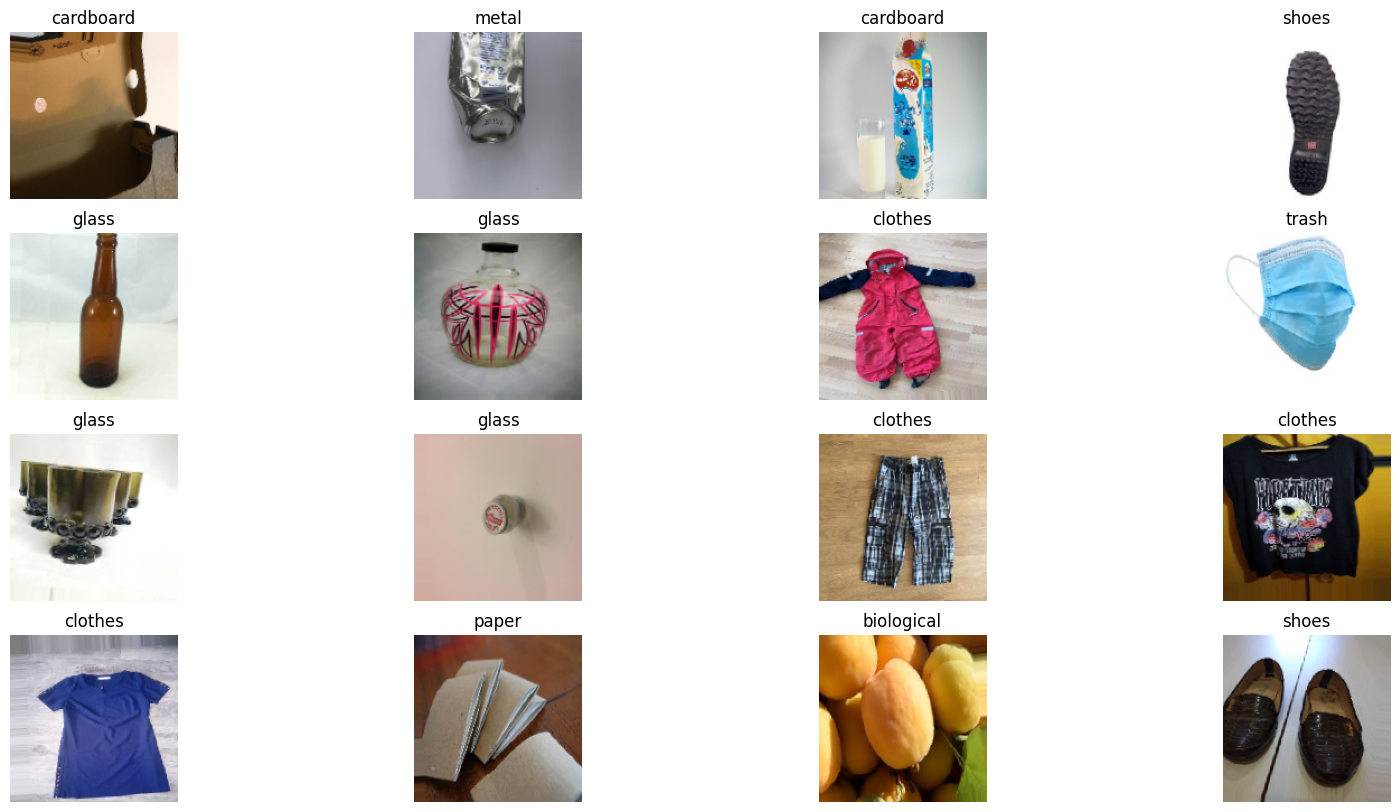

In [11]:
images, targets = next(train_data)

plt.figure(figsize=(20, 10))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(images[i])
  plt.title(labels[targets[i].argmax()])
  plt.axis(False)
plt.show()

In [12]:
model = keras.Sequential([
   keras.layers.Conv2D(32, 3, input_shape=(image_size[0], image_size[1], 3)),
   keras.layers.BatchNormalization(),
   keras.layers.Activation("relu"),
   keras.layers.MaxPooling2D((2, 2)),

   keras.layers.Conv2D(64, 3),
   keras.layers.BatchNormalization(),
   keras.layers.Activation("relu"),
   keras.layers.MaxPooling2D((2, 2)),

   keras.layers.Conv2D(128, 3),
   keras.layers.BatchNormalization(),
   keras.layers.Activation("relu"),
   keras.layers.MaxPooling2D((2, 2)),

   keras.layers.Conv2D(256, 3),
   keras.layers.BatchNormalization(),
   keras.layers.Activation("relu"),
   keras.layers.MaxPooling2D((2, 2)),

   keras.layers.Flatten(),

   keras.layers.Dense(256),
   keras.layers.BatchNormalization(),
   keras.layers.Activation("relu"),
   keras.layers.Dropout(0.3),

   keras.layers.Dense(128),
   keras.layers.BatchNormalization(),
   keras.layers.Activation("relu"),
   keras.layers.Dropout(0.3),

   keras.layers.Dense(train_data.num_classes, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        2

In [14]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)
checkpoint = keras.callbacks.ModelCheckpoint("garbage.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
history = model.fit(train_data, epochs=40, validation_data=valid_data, callbacks=[early_stopping,checkpoint], batch_size=batch_size)

Epoch 1/40
333/333 [==============================] - ETA: 0s - loss: 1.4574 - accuracy: 0.5037
Epoch 1: val_accuracy improved from -inf to 0.35354, saving model to garbage.keras
333/333 [==============================] - 203s 574ms/step - loss: 1.4574 - accuracy: 0.5037 - val_loss: 1.9658 - val_accuracy: 0.3535
Epoch 2/40
333/333 [==============================] - ETA: 0s - loss: 1.1157 - accuracy: 0.6222
Epoch 2: val_accuracy improved from 0.35354 to 0.53328, saving model to garbage.keras
333/333 [==============================] - 182s 546ms/step - loss: 1.1157 - accuracy: 0.6222 - val_loss: 1.3743 - val_accuracy: 0.5333
Epoch 3/40
333/333 [==============================] - ETA: 0s - loss: 0.9787 - accuracy: 0.6703
Epoch 3: val_accuracy improved from 0.53328 to 0.62103, saving model to garbage.keras
333/333 [==============================] - 191s 574ms/step - loss: 0.9787 - accuracy: 0.6703 - val_loss: 1.1069 - val_accuracy: 0.6210
Epoch 4/40
333/333 [==============================] 

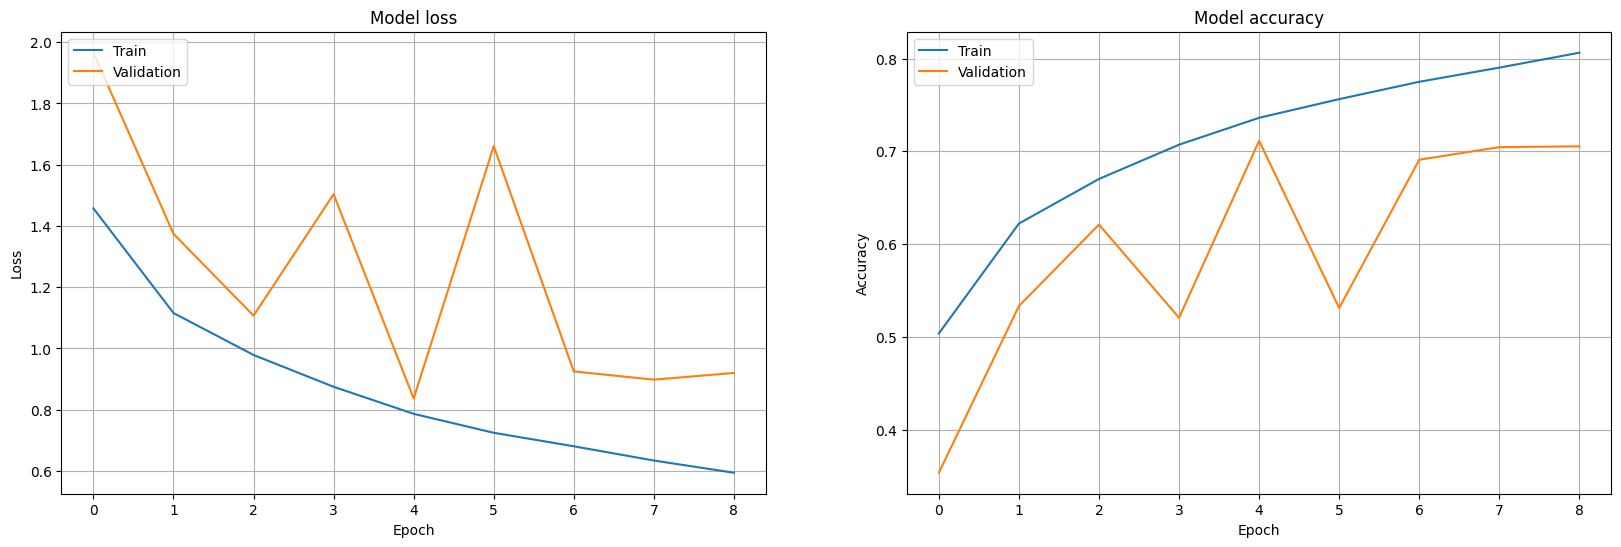

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()


In [20]:
base_model = keras.applications.vgg19.VGG19(include_top=False,weights="imagenet",input_tensor=None,input_shape=(image_size[0], image_size[1], 3),
                                            pooling="max",classes=10,classifier_activation="softmax")

base_model.trainable = True

In [21]:
new_model = keras.Sequential()
new_model.add(base_model)
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(256, activation='relu'))
new_model.add(keras.layers.Dropout(0.2))
new_model.add(keras.layers.Dense(64, activation='relu'))
new_model.add(keras.layers.Dropout(0.2))
new_model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)               

In [23]:
new_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
new_history = new_model.fit(train_data, epochs=40, validation_data=valid_data,  callbacks=[early_stopping, checkpoint], batch_size=batch_size)

Epoch 1/40
333/333 [==============================] - 216s 622ms/step - loss: 1.1963 - accuracy: 0.5917 - val_loss: 0.7936 - val_accuracy: 0.7151
Epoch 2/40
333/333 [==============================] - 195s 585ms/step - loss: 0.8471 - accuracy: 0.7084 - val_loss: 0.6975 - val_accuracy: 0.7512
Epoch 3/40
333/333 [==============================] - 198s 593ms/step - loss: 0.7608 - accuracy: 0.7419 - val_loss: 0.6702 - val_accuracy: 0.7601
Epoch 4/40
333/333 [==============================] - 208s 626ms/step - loss: 0.6996 - accuracy: 0.7648 - val_loss: 0.6322 - val_accuracy: 0.7787
Epoch 5/40
333/333 [==============================] - 209s 628ms/step - loss: 0.6641 - accuracy: 0.7737 - val_loss: 0.6093 - val_accuracy: 0.7859
Epoch 6/40
333/333 [==============================] - 209s 626ms/step - loss: 0.6348 - accuracy: 0.7830 - val_loss: 0.5946 - val_accuracy: 0.7957
Epoch 7/40
333/333 [==============================] - 202s 606ms/step - loss: 0.6134 - accuracy: 0.7911 - val_loss: 0.5550 -

In [25]:
new_model.save("garbage_2.keras")

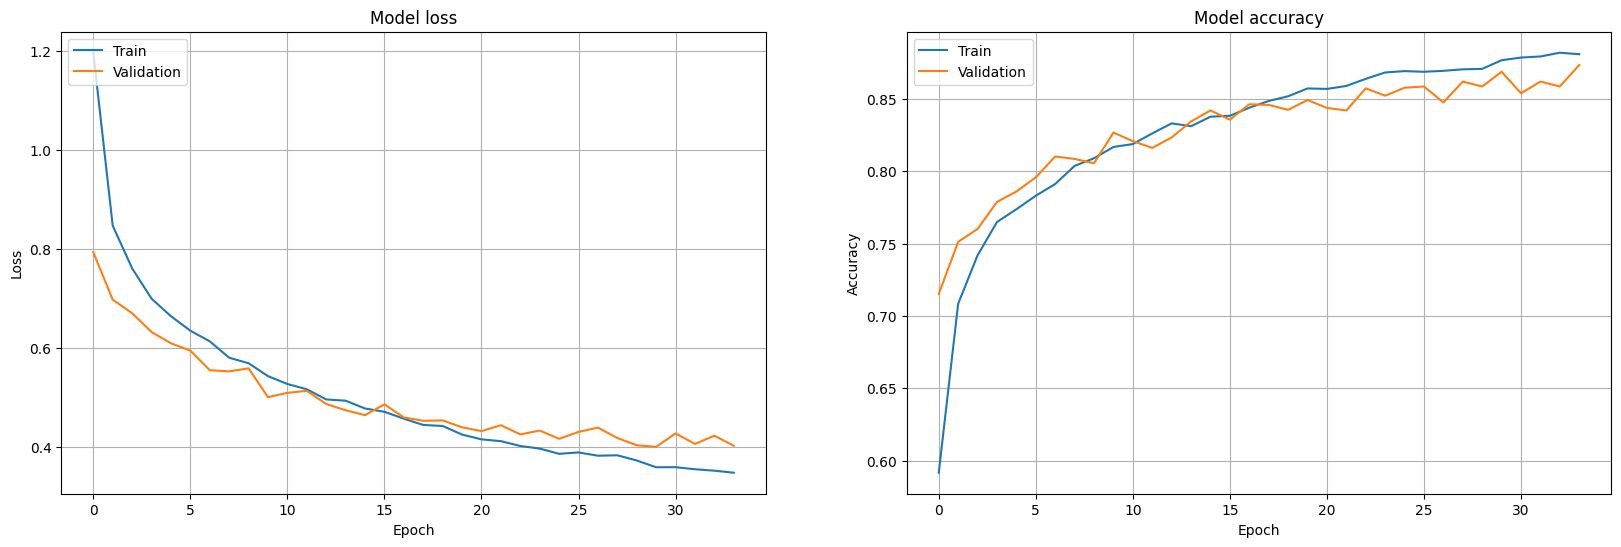

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()

In [34]:
new_model.evaluate(valid_data)

37/37 [==============================] - 20s 528ms/step - loss: 0.3930 - accuracy: 0.8775


[0.3929516673088074, 0.8774904608726501]